In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the diabetes_data.csv.
import pandas as pd
diabetes_data_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Stephen/diabetes_data.csv')
# Display the first few rows
diabetes_data_df.head()


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [2]:
# List of all the columns in the data set
print(diabetes_data_df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')


## Drop Non-Beneficial Columns

In [3]:
# Drop the non-beneficial ID columns, 'PatientID' and 'DoctorInCharge'.
diabetes_data_clean_df = diabetes_data_df.drop(columns=['PatientID', 'Ethnicity',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'DoctorInCharge'])

In [4]:
diabetes_data_clean_df

,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FastingBloodSugar,HbA1c,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,2,1,32.985284,1,4.499365,2.443385,4.898831,4.049885,163.687162,9.283631,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,51,1,1,2,39.916764,0,1.578919,8.301264,8.941093,7.508150,188.347070,7.326870,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,89,1,1,3,19.782251,0,1.177301,6.103395,7.722543,7.708387,127.703653,4.083426,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,21,1,1,2,32.376881,1,1.714621,8.645465,4.804044,6.286548,82.688415,6.516645,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,27,1,1,3,16.808600,0,15.462549,4.629383,2.532756,9.771125,90.743395,5.607222,37.731808,0,0,0,1.218452,6.977741,7.887940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,37,0,2,2,20.811137,0,10.946207,3.217636,8.338196,8.703430,109.832032,5.920723,88.122729,0,0,1,3.154225,3.849584,8.805087,0
1875,80,1,2,2,27.694312,0,16.067905,7.107335,3.034771,4.472689,90.729361,7.332397,77.128599,0,0,1,0.424893,5.217465,0.915878,1
1876,38,1,0,2,35.640824,0,4.865124,9.881212,2.657002,4.812610,149.366801,4.907208,13.148221,0,0,0,0.553757,3.377744,3.017481,1
1877,43,0,2,0,32.423016,0,6.362936,4.750079,8.736024,7.017390,162.027044,8.820613,54.370980,0,0,0,1.132470,0.009250,4.914556,1


In [5]:
print(diabetes_data_clean_df.nunique())

Age                                71
Gender                              2
SocioeconomicStatus                 3
EducationLevel                      4
BMI                              1879
Smoking                             2
AlcoholConsumption               1879
PhysicalActivity                 1879
DietQuality                      1879
SleepQuality                     1879
FastingBloodSugar                1879
HbA1c                            1879
QualityOfLifeScore               1879
HeavyMetalsExposure                 2
OccupationalExposureChemicals       2
WaterQuality                        2
MedicalCheckupsFrequency         1879
MedicationAdherence              1879
HealthLiteracy                   1879
Diagnosis                           2
dtype: int64


## Binning w/ Logarithmic Transformation

**Columns:** 'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                        'SleepQuality', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
                        'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
                        'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels',
                        'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence',
                        'HealthLiteracy'
                      


In [6]:
print(diabetes_data_clean_df.columns)

Index(['Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FastingBloodSugar', 'HbA1c', 'QualityOfLifeScore',
       'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis'],
      dtype='object')


In [7]:
def log_transform_and_bin(diabetes_data_clean_df, columns, num_bins=10, drop_original=True):
    """
    Logarithmically transform specified columns, bin them, and optionally drop the original columns.

    Parameters:
        diabetes_data_clean_df (pd.DataFrame): The DataFrame to be transformed.
        columns (list): List of columns to log-transform and bin.
        num_bins (int): The number of bins to create. Default is 10.
        drop_original (bool): If True, drop the original columns. Default is True.

    Returns:
        pd.DataFrame: The transformed DataFrame with binned columns.
    """

    transformed_df = diabetes_data_clean_df.copy()

    for col in columns:
        # Log-transform the specified column
        transformed_df[f'Log_{col}'] = np.log1p(transformed_df[col])

        # Create bins based on the log-transformed values
        log_bins = pd.cut(transformed_df[f'Log_{col}'], bins=num_bins)

        # Access the bin edges from the categorical object
        bin_edges_log_scale = log_bins.cat.categories

        # Reverse the logarithmic transformation to get the bin edges on the original scale
        bin_edges = np.expm1([bin_edges_log_scale.left.min()] + list(bin_edges_log_scale.right))

        # Ensure bin edges are unique
        bin_edges = np.unique(bin_edges)

        # Create bin labels corresponding to the reversed log-transformed bin edges
        bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1]-1)}' for i in range(len(bin_edges)-1)]

        # Assign the custom labels and create the binned column in the original DataFrame
        transformed_df[f'{col}_Bins'] = pd.cut(transformed_df[col], bins=bin_edges, labels=bin_labels, right=False, ordered=False)

        # Optionally drop the original and temporary Log column
        if drop_original:
            transformed_df.drop(columns=[col, f'Log_{col}'], inplace=True)
        else:
            transformed_df.drop(columns=[f'Log_{col}'], inplace=True)

    return transformed_df

# Example usage
# Assuming 'diabetes_data_clean_df' is already defined and has the specified columns
columns_to_transform = ['Age','BMI',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FastingBloodSugar', 'HbA1c', 'QualityOfLifeScore',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
        ]

transformed_df = log_transform_and_bin(diabetes_data_clean_df, columns_to_transform)

# Display the first few rows of the transformed DataFrame
print(transformed_df.head())



   Gender  SocioeconomicStatus  EducationLevel  Smoking  HeavyMetalsExposure  \
0       0                    2               1        1                    0   
1       1                    1               2        0                    0   
2       1                    1               3        0                    0   
3       1                    1               2        1                    0   
4       1                    1               3        0                    0   

   OccupationalExposureChemicals  WaterQuality  Diagnosis Age_Bins BMI_Bins  \
0                              0             0          1    42-48    29-31   
1                              0             1          1    49-56    36-39   
2                              0             0          0    77-89    18-19   
3                              0             1          0    19-22    29-31   
4                              0             0          0    23-26    16-17   

  AlcoholConsumption_Bins PhysicalActivity_B

In [8]:
transformed_df.head(5)

,Gender,SocioeconomicStatus,EducationLevel,Smoking,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Diagnosis,Age_Bins,BMI_Bins,AlcoholConsumption_Bins,PhysicalActivity_Bins,DietQuality_Bins,SleepQuality_Bins,FastingBloodSugar_Bins,HbA1c_Bins,QualityOfLifeScore_Bins,MedicalCheckupsFrequency_Bins,MedicationAdherence_Bins,HealthLiteracy_Bins
0,0,2,1,1,0,0,0,1,42-48,29-31,3-4,2-2,4-4,4-3,162-179,9-8,62-98,1-1,4-4,5-6
1,1,1,2,0,0,0,1,1,49-56,36-39,1-1,7-8,7-9,7-6,180-198,7-6,62-98,3-2,5-6,4-4
2,1,1,3,0,0,0,0,0,77-89,18-19,0-0,5-6,7-9,7-7,118-130,3-3,39-61,2-2,7-9,5-6
3,1,1,2,1,0,0,1,0,19-22,29-31,1-1,7-8,4-4,5-5,77-85,6-6,62-98,1-0,2-2,4-4
4,1,1,3,0,0,0,0,0,23-26,16-17,14-18,4-4,2-2,9-8,86-95,5-4,24-38,0-0,5-6,7-8


In [9]:
print(transformed_df.nunique())

Gender                            2
SocioeconomicStatus               3
EducationLevel                    4
Smoking                           2
HeavyMetalsExposure               2
OccupationalExposureChemicals     2
WaterQuality                      2
Diagnosis                         2
Age_Bins                         10
BMI_Bins                         10
AlcoholConsumption_Bins           8
PhysicalActivity_Bins             8
DietQuality_Bins                  8
SleepQuality_Bins                 9
FastingBloodSugar_Bins           10
HbA1c_Bins                       10
QualityOfLifeScore_Bins           9
MedicalCheckupsFrequency_Bins     6
MedicationAdherence_Bins          8
HealthLiteracy_Bins               8
dtype: int64


## Dummies

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
transformed_dummies_df = pd.get_dummies(transformed_df, columns=['SocioeconomicStatus', 'EducationLevel',
       'Age_Bins', 'BMI_Bins', 'AlcoholConsumption_Bins',
       'PhysicalActivity_Bins', 'DietQuality_Bins', 'SleepQuality_Bins',
       'FastingBloodSugar_Bins','HbA1c_Bins',
       'QualityOfLifeScore_Bins', 'MedicalCheckupsFrequency_Bins',
       'MedicationAdherence_Bins', 'HealthLiteracy_Bins'])
transformed_dummies_df.head()

,Gender,Smoking,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Diagnosis,SocioeconomicStatus_0,SocioeconomicStatus_1,SocioeconomicStatus_2,EducationLevel_0,...,MedicationAdherence_Bins_5-6,MedicationAdherence_Bins_7-9,HealthLiteracy_Bins_0-0,HealthLiteracy_Bins_1-0,HealthLiteracy_Bins_1-1,HealthLiteracy_Bins_2-2,HealthLiteracy_Bins_3-3,HealthLiteracy_Bins_4-4,HealthLiteracy_Bins_5-6,HealthLiteracy_Bins_7-8
0,0,1,0,0,0,1,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,1,1,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
2,1,0,0,0,0,0,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,1,1,0,0,1,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,0,0,0,0,0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True


## Identify Target (y) and Features (X)

In [11]:
# Split our preprocessed data into our features and target arrays
y = transformed_dummies_df["Diagnosis"]
X = transformed_dummies_df.drop(columns="Diagnosis")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    stratify=y)
X_train.shape

(1409, 116)

In [12]:
print(X_train.dtypes)

Gender                           int64
Smoking                          int64
HeavyMetalsExposure              int64
OccupationalExposureChemicals    int64
WaterQuality                     int64
                                 ...  
HealthLiteracy_Bins_2-2           bool
HealthLiteracy_Bins_3-3           bool
HealthLiteracy_Bins_4-4           bool
HealthLiteracy_Bins_5-6           bool
HealthLiteracy_Bins_7-8           bool
Length: 116, dtype: object


## StandardScaler

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Neural Network #1

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=7, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │           1,170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,309 (5.11 KB)

 Trainable params: 1,309 (5.11 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

# Train the model and pass the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[checkpoint_callback])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9591 - loss: 0.1843
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9603 - loss: 0.1818
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9644 - loss: 0.1708
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9587 - loss: 0.1853
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9609 - loss: 0.1767
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9533 - loss: 0.1957
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9594 - loss: 0.1804
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9630 - loss: 0.1707
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9648 - loss: 0.1670
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9524 - loss: 0.1962
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9720 - loss: 0.1426
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accurac

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - 14ms/step - accuracy: 0.8149 - loss: 0.4999
Loss: 0.4998649060726166, Accuracy: 0.8148936033248901


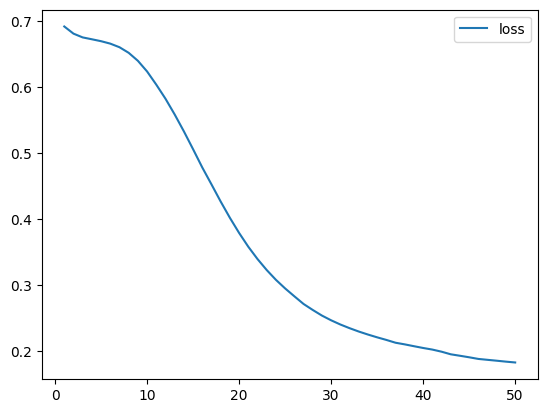

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

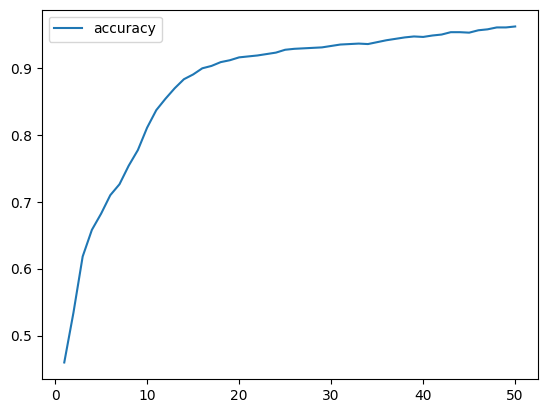

In [19]:
history_df.plot(y="accuracy")
plt.show()

# Weakest and Strongest Features

In [20]:
!pip install scikeras scikit-learn

In [21]:
!pip install --upgrade scipy scikit-learn scikeras

In [22]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Ensure that nn is defined as your Keras model

# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test_scaled.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")




Weakest feature: OccupationalExposureChemicals with importance -0.007446808510638292
Weakest feature: HealthLiteracy_Bins_4-4 with importance -0.006808510638297849
Weakest feature: AlcoholConsumption_Bins_5-6 with importance -0.006808510638297849
Weakest feature: BMI_Bins_22-23 with importance -0.00574468085106381
Weakest feature: MedicationAdherence_Bins_0-0 with importance -0.004468085106382957
Weakest feature: EducationLevel_1 with importance -0.004468085106382957
Weakest feature: Age_Bins_27-30 with importance -0.0031914893617020932
Weakest feature: BMI_Bins_27-28 with importance -0.0031914893617020932
Weakest feature: DietQuality_Bins_7-9 with importance -0.0029787234042552902
Weakest feature: HealthLiteracy_Bins_7-8 with importance -0.0025531914893616725
Weakest feature: MedicationAdherence_Bins_3-3 with importance -0.0025531914893616725
Weakest feature: SleepQuality_Bins_4-3 with importance -0.0023404255319148803
Weakest feature: Age_Bins_77-89 with importance -0.002340425531914

In [23]:
# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test_scaled.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")

Strongest feature: HbA1c_Bins_4-3 with importance 0.04000000000000002
Strongest feature: FastingBloodSugar_Bins_96-105 with importance 0.03574468085106384
Strongest feature: HbA1c_Bins_4-4 with importance 0.03319148936170215
Strongest feature: HbA1c_Bins_5-5 with importance 0.03276595744680853
Strongest feature: FastingBloodSugar_Bins_86-95 with importance 0.032127659574468115
Strongest feature: FastingBloodSugar_Bins_77-85 with importance 0.030425531914893646
Strongest feature: HbA1c_Bins_3-3 with importance 0.029574468085106397
Strongest feature: FastingBloodSugar_Bins_162-179 with importance 0.025957446808510663
Strongest feature: FastingBloodSugar_Bins_106-117 with importance 0.02531914893617023
Strongest feature: FastingBloodSugar_Bins_180-198 with importance 0.02404255319148938
Strongest feature: HbA1c_Bins_7-7 with importance 0.022765957446808528
Strongest feature: FastingBloodSugar_Bins_146-161 with importance 0.022340425531914933
Strongest feature: HbA1c_Bins_8-8 with importan